In [28]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [29]:
df = pd.read_csv("health-risk-prediction-anonymized-real-data/Health_Risk_Dataset.csv")
df.head()

,Patient_ID,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,Consciousness,On_Oxygen,Risk_Level
0,P0522,25,96,1,97,107,37.5,A,0,Medium
1,P0738,28,92,2,116,151,38.5,P,1,High
2,P0741,29,91,1,79,135,38.4,A,0,High
3,P0661,24,96,1,95,92,37.3,A,0,Medium
4,P0412,20,96,1,97,97,37.4,A,0,Low


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient_ID         1000 non-null   object 
 1   Respiratory_Rate   1000 non-null   int64  
 2   Oxygen_Saturation  1000 non-null   int64  
 3   O2_Scale           1000 non-null   int64  
 4   Systolic_BP        1000 non-null   int64  
 5   Heart_Rate         1000 non-null   int64  
 6   Temperature        1000 non-null   float64
 7   Consciousness      1000 non-null   object 
 8   On_Oxygen          1000 non-null   int64  
 9   Risk_Level         1000 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 78.3+ KB


In [31]:
df.describe()

,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,On_Oxygen
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,21.511000,92.59000,1.124000,106.160000,98.460000,37.921000,0.274000
std,5.287517,4.47302,0.329746,17.897562,19.694626,1.113696,0.446232
min,12.000000,74.00000,1.000000,50.000000,60.000000,35.600000,0.000000
25%,17.000000,90.00000,1.000000,94.000000,84.000000,37.100000,0.000000
50%,20.000000,94.00000,1.000000,109.000000,95.500000,37.800000,0.000000
75%,25.000000,96.00000,1.000000,119.000000,109.000000,38.600000,1.000000
max,40.000000,100.00000,2.000000,146.000000,163.000000,41.800000,1.000000


In [32]:
# Converting PatientID to String, Consciousness and Risk_Level to category
df["Patient_ID"] = df["Patient_ID"].astype("string")
df["O2_Scale"] = df["O2_Scale"].astype("category")
df["Consciousness"] = df["Consciousness"].astype("category")
df["On_Oxygen"] = df["On_Oxygen"].astype("category")
df["Risk_Level"] = df["Risk_Level"].astype("category")

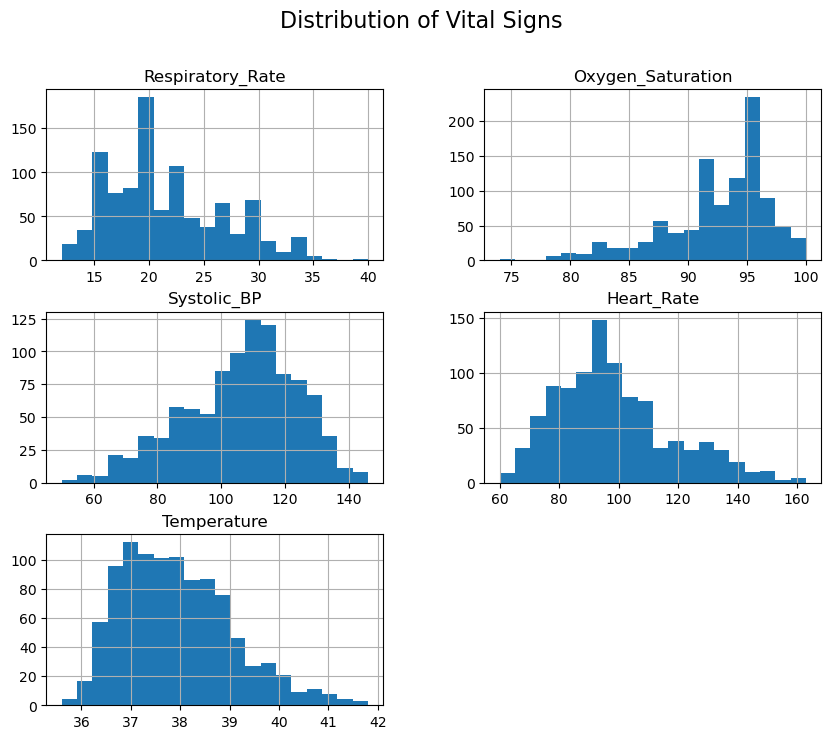

In [33]:
df.hist(figsize=(10,8), bins=20)
plt.suptitle("Distribution of Vital Signs", fontsize=16)
plt.show()

In [34]:
groups = df.groupby("Risk_Level")
new_groups = [group["Respiratory_Rate"].values for name, group in groups]
f_stat, p_val = stats.f_oneway(*new_groups)
print(f"ANOVA F-statistic: {f_stat}, p-value: {p_val}")

ANOVA F-statistic: 724.3706495626739, p-value: 9.680624282634389e-250


C:\Users\abhin\AppData\Local\Temp\ipykernel_6520\13622491.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df.groupby("Risk_Level")


In [35]:
tukey = pairwise_tukeyhsd(endog=df["Respiratory_Rate"], groups=df["Risk_Level"], alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
  High    Low  -9.5003   0.0 -10.1621  -8.8384   True
  High Medium   -7.031   0.0  -7.6634  -6.3986   True
  High Normal -12.0804   0.0  -12.838 -11.3228   True
   Low Medium   2.4693   0.0   1.8215    3.117   True
   Low Normal  -2.5801   0.0  -3.3506  -1.8097   True
Medium Normal  -5.0494   0.0  -5.7947  -4.3041   True
-----------------------------------------------------


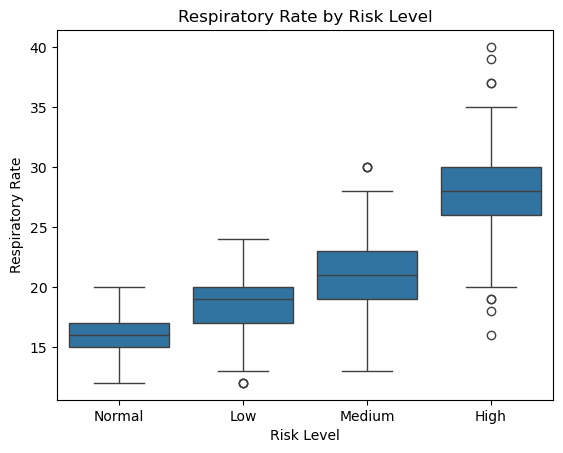

In [39]:
sns.boxplot(x="Risk_Level", y="Respiratory_Rate", data=df, order=["Normal", "Low", "Medium", "High"])
plt.xlabel("Risk Level")
plt.ylabel("Respiratory Rate")
plt.title("Respiratory Rate by Risk Level")
plt.show()

After running a one-way ANOVA on respiratory rates against risk levels, it was found that at least one mean is statistically different among the groups with a p-value less than 0.05. To further investigate this, a post hoc Tukey's HSD was run and determined a relationship such that respiratory rates increase in the following order: normal, low, medium, high. This indicates that each level increase like low to medium, corresponds with an increase in respiratory rate. The data contains outliers with the low, medium, and high levels. However, the data still trends in the direction that an increase in respiratory rate corresponds with an increase in risk level.